In [9]:
import pandas as pd
import numpy as np

## New Data

In [342]:
data = pd.read_csv(r"Crime_Data_from_2020_to_Present.csv")
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [343]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
data['month_year'] = data['DATE OCC'].dt.strftime('%m-%Y')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,month_year
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,01-2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,01-2020
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,02-2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,01-2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,01-2020


In [344]:
# data1 = data[["AREA NAME","Crm Cd Desc","Vict Age","Vict Sex","Vict Descent"]]
data2 = data[["DATE OCC","AREA NAME","Vict Age","Crm Cd Desc","Vict Sex","Vict Descent", "month_year"]]
data2 = data2.dropna(subset=["Vict Sex","Vict Descent"])
print(data2["AREA NAME"].unique())
print(data2["Vict Descent"].unique())
# print(data2.head())
# print(len(data2))

['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Rampart'
 '77th Street' 'Hollenbeck' 'Southeast' 'Pacific' 'Newton' 'Hollywood'
 'Foothill' 'Olympic' 'Topanga']
['B' 'H' 'X' 'W' 'A' 'O' 'C' 'F' 'K' 'I' 'V' 'Z' 'J' 'P' 'S' 'G' 'U' 'D'
 'L' '-']


In [345]:
offenses = [
    'BATTERY - SIMPLE ASSAULT', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'OTHER MISCELLANEOUS CRIME', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'BURGLARY FROM VEHICLE',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT PLAIN - PETTY ($950 & UNDER)',
    'THEFT OF IDENTITY', 'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BURGLARY', 'VEHICLE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
    'BUNCO, GRAND THEFT', 'THEFT, PERSON', 'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN', 'BATTERY POLICE (SIMPLE)',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'VIOLATION OF COURT ORDER', 'TRESPASSING',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'VIOLATION OF RESTRAINING ORDER', 'DISTURBING THE PEACE',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT', 'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'CHILD STEALING',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'BOMB SCARE',
    'DOCUMENT FORGERY / STOLEN FELONY', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'SHOTS FIRED AT INHABITED DWELLING', 'BURGLARY, ATTEMPTED', 'INDECENT EXPOSURE', 'ORAL COPULATION',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'BUNCO, PETTY THEFT',
    'KIDNAPPING - GRAND ATTEMPT', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'RESISTING ARREST',
    'DISCHARGE FIREARMS/SHOTS FIRED', 'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
    'LEWD CONDUCT', 'UNAUTHORIZED COMPUTER ACCESS', 'PURSE SNATCHING',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT',
    'CHILD ANNOYING (17YRS & UNDER)', 'BUNCO, ATTEMPT', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'PIMPING', 'STALKING',
    'THEFT PLAIN - ATTEMPT', 'RAPE, ATTEMPTED', 'SHOPLIFTING - ATTEMPT', 'THEFT FROM PERSON - ATTEMPT',
    'FALSE IMPRISONMENT', 'BURGLARY FROM VEHICLE, ATTEMPTED', 'FAILURE TO YIELD', 'VEHICLE - ATTEMPT STOLEN',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER', 'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER', 'PICKPOCKET', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
    'CRIMINAL HOMICIDE', 'PROWLER', 'DOCUMENT WORTHLESS ($200 & UNDER)', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'DISHONEST EMPLOYEE - GRAND THEFT', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
    'CHILD PORNOGRAPHY', 'PEEPING TOM', 'BATTERY ON A FIREFIGHTER', 'TILL TAP - PETTY ($950 & UNDER)',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'TILL TAP - GRAND THEFT ($950.01 & OVER)',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'DRIVING WITHOUT OWNER CONSENT (DWOC)',
    'DOCUMENT WORTHLESS ($200.01 & OVER)', 'CRUELTY TO ANIMALS', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'LYNCHING - ATTEMPTED',
    'FALSE POLICE REPORT', 'PANDERING', 'ILLEGAL DUMPING', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
    'PETTY THEFT - AUTO REPAIR', 'MANSLAUGHTER, NEGLIGENT', 'RECKLESS DRIVING', 'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN', 'CONSPIRACY', 'CONTRIBUTING', 'WEAPONS POSSESSION/BOMBING', 'BRIBERY', 'BOAT - STOLEN',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 'GRAND THEFT / INSURANCE FRAUD', 'LYNCHING', 'DISRUPT SCHOOL',
    'DISHONEST EMPLOYEE - PETTY THEFT', 'THEFT, COIN MACHINE - ATTEMPT', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 'DRUGS, TO A MINOR', 'GRAND THEFT / AUTO REPAIR',
    'DRUNK ROLL', 'PICKPOCKET, ATTEMPT', 'CHILD ABANDONMENT', 'TELEPHONE PROPERTY - DAMAGE',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'BIGAMY', 'FAILURE TO DISPERSE',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
    'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]
print(len(offenses))
# Dictionary to store offenses by category
offenses_dict = {
    'Violent Crimes': [],
    'Property Crimes': [],
    'Sexual Offenses': [],
    'White-Collar Crimes': [],
    'Public Order Crimes': [],
    'Crimes Against Property and Services': [],
    'Other Crimes': [],
    'Petty Thefts':[],
    'Grand Thefts':[],
}

# Categorize offenses
for offense in offenses:
    if 'RAPE' in offense or 'SEXUAL' in offense or 'LEWD' in offense or 'SODOMY' in offense or 'CHILD' in offense or 'SEX' in offense:
        offenses_dict['Sexual Offenses'].append(offense)
    elif '$950.01' in offense:
        offenses_dict['Grand Thefts'].append(offense)
    elif '$950' in offense:
        offenses_dict['Petty Thefts'].append(offense)
    elif 'VANDALISM' in offense or 'BURGLARY' in offense or 'THEFT' in offense or 'FRAUD' in offense or 'EMBEZZLEMENT' in offense or 'STOLE' in offense or 'SHOPLIFTING' in offense:
        offenses_dict['Property Crimes'].append(offense)
    elif 'ASSAULT' in offense or 'BATTERY' in offense or 'ROBBERY' in offense or 'ARSON' in offense or 'KIDNAPPING' in offense or 'HOMICIDE' in offense or 'LYNCHING' in offense:
        offenses_dict['Violent Crimes'].append(offense)
    elif 'WEAPON' in offense or 'DISTURBING' in offense or 'DISCHARGE' in offense or 'RIOT' in offense or 'BLOCKING' in offense:
        offenses_dict['Public Order Crimes'].append(offense)
    elif 'THEFT FROM MOTOR VEHICLE' in offense or 'TILL TAP' in offense or 'PURSE SNATCHING' in offense or 'PICKPOCKET' in offense:
        offenses_dict['Crimes Against Property and Services'].append(offense)
    elif 'FRAUD' in offense or 'COUNTERFEIT' in offense or 'BRIBERY' in offense or 'FORGERY' in offense:
        offenses_dict['White-Collar Crimes'].append(offense)
    else:
        offenses_dict['Other Crimes'].append(offense)

# Print the categorized offenses
# for category, offense_list in offenses_dict.items():
#     print(f"{category}:\n{offense_list}\n")


138


In [346]:
offenses_dict["Property Crimes"].remove('THEFT OF IDENTITY')
offenses_dict["White-Collar Crimes"].append('THEFT OF IDENTITY')
offenses_dict["Property Crimes"].remove('DOCUMENT FORGERY / STOLEN FELONY')
offenses_dict["White-Collar Crimes"].append('DOCUMENT FORGERY / STOLEN FELONY')
offenses_dict["Sexual Offenses"].remove('CHILD STEALING')
offenses_dict["Other Crimes"].append('CHILD STEALING')
offenses_dict["Sexual Offenses"].remove('CHILD ANNOYING (17YRS & UNDER)')
offenses_dict["Other Crimes"].append('CHILD ANNOYING (17YRS & UNDER)')
offenses_dict["Sexual Offenses"].remove('CHILD NEGLECT (SEE 300 W.I.C.)')
offenses_dict["Other Crimes"].append('CHILD NEGLECT (SEE 300 W.I.C.)')
offenses_dict["Sexual Offenses"].remove('CHILD ABANDONMENT')
offenses_dict["Other Crimes"].append('CHILD ABANDONMENT')
offenses_dict["Other Crimes"].remove('TRESPASSING')
offenses_dict["Property Crimes"].append('TRESPASSING')
offenses_dict["Other Crimes"].remove('BOMB SCARE')
offenses_dict["Public Order Crimes"].append('BOMB SCARE')
offenses_dict["Other Crimes"].remove('SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT')
offenses_dict["Public Order Crimes"].append('SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT')
for category, offense_list in offenses_dict.items():
    print(f"{category}:\n{offense_list}\n")

Violent Crimes:
['BATTERY - SIMPLE ASSAULT', 'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'BATTERY POLICE (SIMPLE)', 'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'KIDNAPPING - GRAND ATTEMPT', 'KIDNAPPING', 'CRIMINAL HOMICIDE', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'BATTERY ON A FIREFIGHTER', 'LYNCHING - ATTEMPTED', 'LYNCHING']

Property Crimes:
['VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'BURGLARY FROM VEHICLE', 'BURGLARY', 'VEHICLE - STOLEN', 'BUNCO, GRAND THEFT', 'THEFT, PERSON', 'BIKE - STOLEN', 'THEFT FROM MOTOR VEHICLE - ATTEMPT', 'BURGLARY, ATTEMPTED', 'BUNCO, PETTY THEFT', 'THEFT PLAIN - ATTEMPT', 'SHOPLIFTING - ATTEMPT', 'THEFT FROM PERSON - ATTEMPT', 'BURGLARY FROM VEHICLE, ATTEMPTED', 'VEHICLE - ATTEMPT STOLEN', 'DISHONEST EMPLOYEE - GRAND THEFT', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'PETTY

In [347]:
def crime_category(row):
    for category in offenses_dict.keys():
        if row["Crm Cd Desc"] in offenses_dict[category]:
            return category
            break
    return "Other Crimes"

In [348]:
data2['Crime Category'] = data2.apply(crime_category, axis=1)
data2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,month_year,Crime Category
0,2020-01-08,Southwest,36,BATTERY - SIMPLE ASSAULT,F,B,01-2020,Violent Crimes
1,2020-01-01,Central,25,BATTERY - SIMPLE ASSAULT,M,H,01-2020,Violent Crimes
2,2020-02-13,Central,0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,X,02-2020,Sexual Offenses
3,2020-01-01,N Hollywood,76,VANDALISM - MISDEAMEANOR ($399 OR UNDER),F,W,01-2020,Property Crimes
4,2020-01-01,Mission,31,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,X,01-2020,Property Crimes


In [349]:
data2 = data2[(data2["Vict Age"] != 0) & (data2["Vict Sex"] != "X") & (data2["Vict Sex"] != "H") & (data2["Vict Sex"] != "-") & (data2["Vict Sex"] != "N") & (data2["Vict Descent"] != "X") & (data2["Vict Descent"] != "-") & (data2["Crm Cd Desc"] != None)]
print(len(data2))

607646


In [350]:
import matplotlib.pyplot as plt
def plot_pie_chart(data, column_name, title):
    counts = data[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

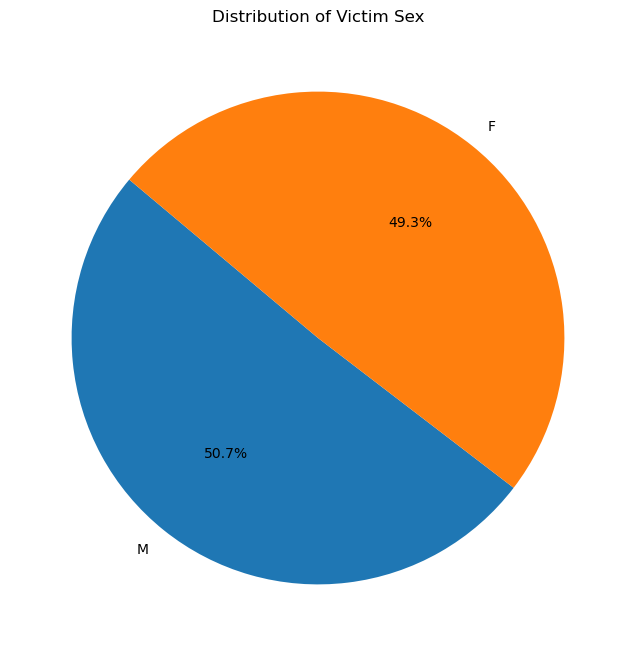

In [351]:
plot_pie_chart(data2, "Vict Sex", "Distribution of Victim Sex")

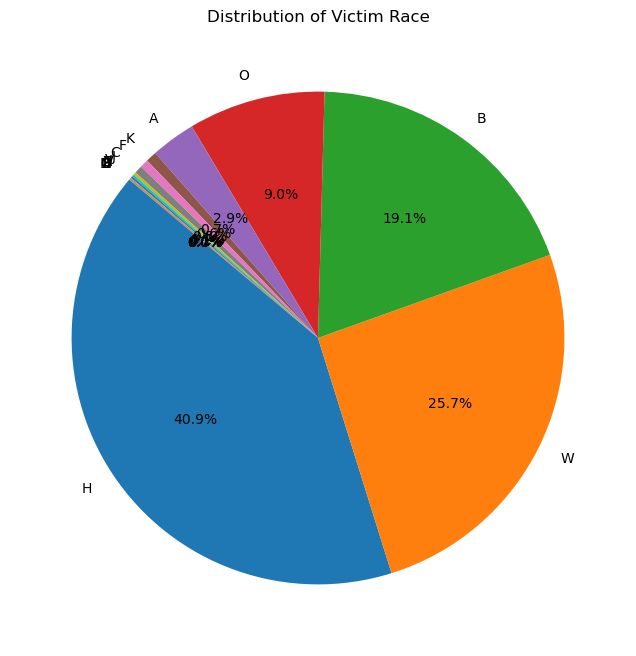

In [352]:
plot_pie_chart(data2, "Vict Descent", "Distribution of Victim Race")

In [353]:
def race_category(row):
    category = ['H','B','W']
    if row["Vict Descent"] not in category:
        return 'O'
    else: 
        return row["Vict Descent"]

In [354]:
data2['Vict Race'] = data2.apply(race_category, axis=1)
data2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,month_year,Crime Category,Vict Race
0,2020-01-08,Southwest,36,BATTERY - SIMPLE ASSAULT,F,B,01-2020,Violent Crimes,B
1,2020-01-01,Central,25,BATTERY - SIMPLE ASSAULT,M,H,01-2020,Violent Crimes,H
3,2020-01-01,N Hollywood,76,VANDALISM - MISDEAMEANOR ($399 OR UNDER),F,W,01-2020,Property Crimes,W
5,2020-01-01,Central,25,"RAPE, FORCIBLE",F,H,01-2020,Sexual Offenses,H
6,2020-01-02,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,H,01-2020,Petty Thefts,H


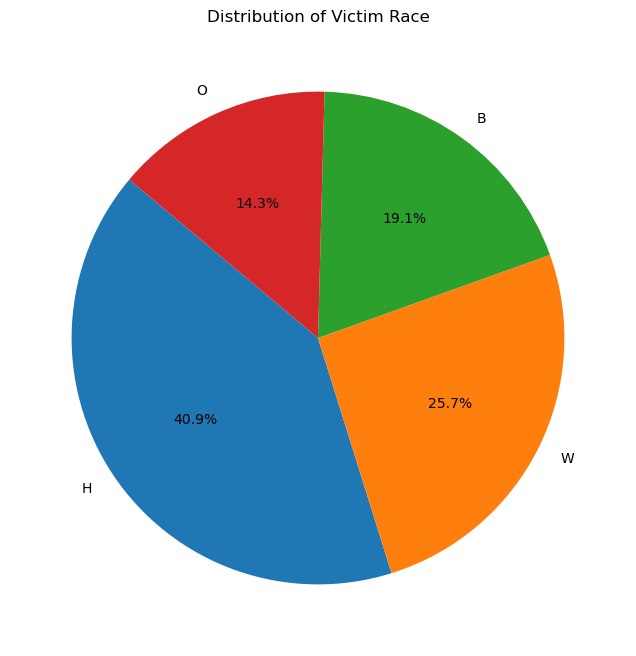

In [355]:
plot_pie_chart(data2, "Vict Race", "Distribution of Victim Race")

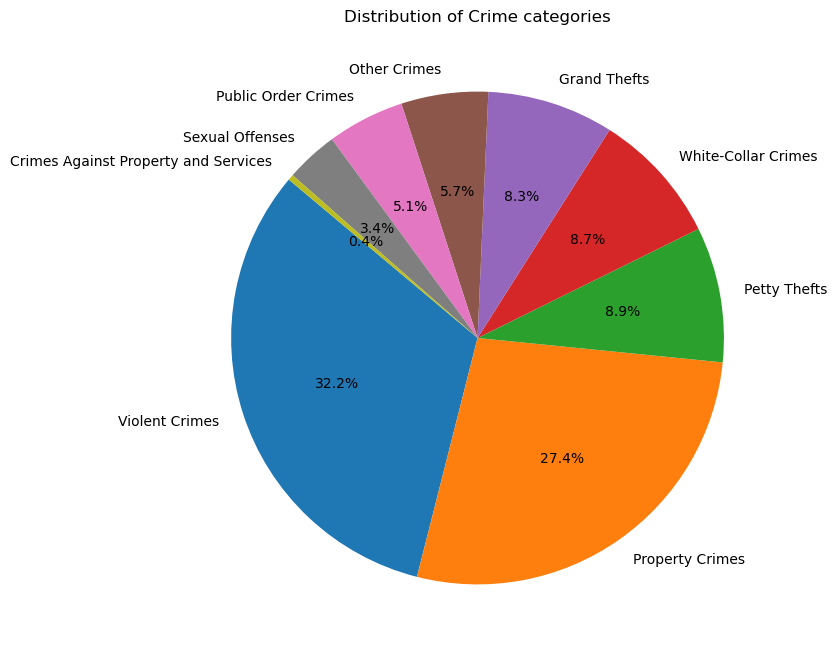

In [356]:
plot_pie_chart(data2, "Crime Category", "Distribution of Crime categories")

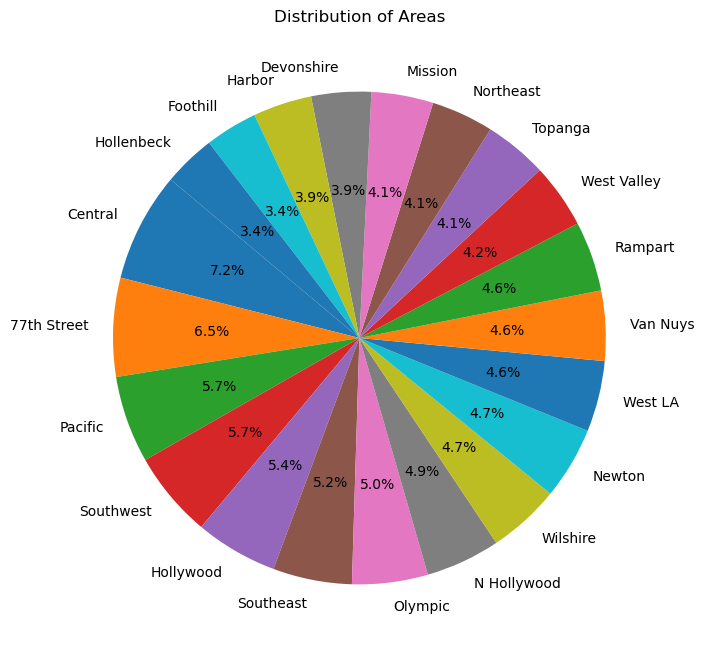

In [357]:
plot_pie_chart(data2, "AREA NAME", "Distribution of Areas")

In [358]:
def categorize_areas(area):
    if area in ['Hollywood', 'Wilshire', 'Rampart', 'Olympic', 'Newton', '77th Street', 'Central', 'Northeast']:
        return 'Central LA'
    elif area in ['Southwest', 'Southeast']:
        return 'South LA'
    elif area in ['N Hollywood', 'Van Nuys', 'West Valley', 'Topanga']:
        return 'Valley'
    elif area in ['Mission', 'Hollenbeck']:
        return 'East LA'
    elif area == 'Harbor':
        return 'Harbor Area'
    elif area in ['West LA', 'Pacific']:
        return 'West LA'
    elif area in ['Devonshire', 'Foothill']:
        return 'Foothill Area'
    else:
        return 'Other'

# Example usage:
areas = ['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire', 'Northeast',
         'Harbor', 'Van Nuys', 'West Valley', 'West LA', 'Wilshire', 'Rampart',
         '77th Street', 'Hollenbeck', 'Southeast', 'Pacific', 'Newton', 'Hollywood',
         'Foothill', 'Olympic', 'Topanga']

category_mapping = {area: categorize_areas(area) for area in areas}

for area, category in category_mapping.items():
    print(f"{area}: {category}")

Southwest: South LA
Central: Central LA
N Hollywood: Valley
Mission: East LA
Devonshire: Foothill Area
Northeast: Central LA
Harbor: Harbor Area
Van Nuys: Valley
West Valley: Valley
West LA: West LA
Wilshire: Central LA
Rampart: Central LA
77th Street: Central LA
Hollenbeck: East LA
Southeast: South LA
Pacific: West LA
Newton: Central LA
Hollywood: Central LA
Foothill: Foothill Area
Olympic: Central LA
Topanga: Valley


In [359]:
def region_category(row):
    for category in category_mapping.keys():
        if row["AREA NAME"] == category:
            return category_mapping[category]
            break

In [360]:
data2['Area Category'] = data2.apply(region_category, axis=1)
data2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,month_year,Crime Category,Vict Race,Area Category
0,2020-01-08,Southwest,36,BATTERY - SIMPLE ASSAULT,F,B,01-2020,Violent Crimes,B,South LA
1,2020-01-01,Central,25,BATTERY - SIMPLE ASSAULT,M,H,01-2020,Violent Crimes,H,Central LA
3,2020-01-01,N Hollywood,76,VANDALISM - MISDEAMEANOR ($399 OR UNDER),F,W,01-2020,Property Crimes,W,Valley
5,2020-01-01,Central,25,"RAPE, FORCIBLE",F,H,01-2020,Sexual Offenses,H,Central LA
6,2020-01-02,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,H,01-2020,Petty Thefts,H,Central LA


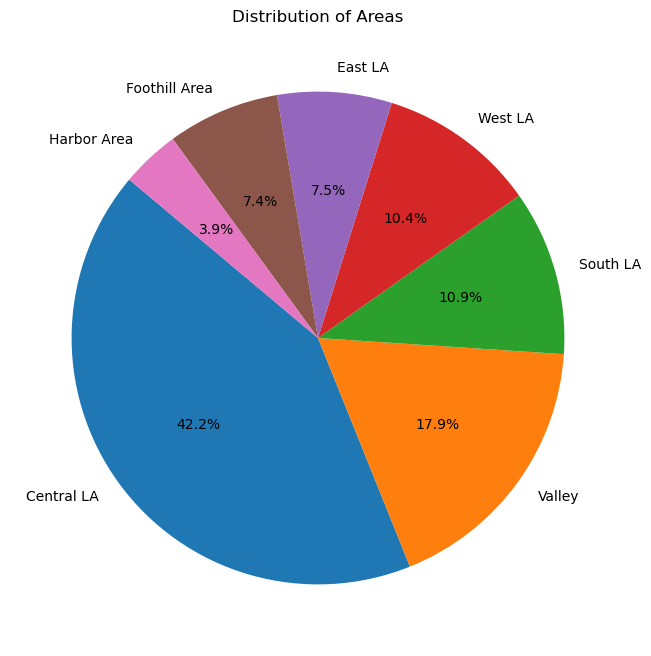

In [361]:
plot_pie_chart(data2, "Area Category", "Distribution of Areas")

In [362]:
def age_category(row):
    age = row["Vict Age"]
    if (age > 0) and (age <= 30):
        return 'Youth'
    elif (age > 30) and (age <= 60):
        return 'Middle-aged'
    else: 
        return 'Senior'

data2['Vict Age group'] = data2.apply(age_category, axis=1)
data2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,month_year,Crime Category,Vict Race,Area Category,Vict Age group
0,2020-01-08,Southwest,36,BATTERY - SIMPLE ASSAULT,F,B,01-2020,Violent Crimes,B,South LA,Middle-aged
1,2020-01-01,Central,25,BATTERY - SIMPLE ASSAULT,M,H,01-2020,Violent Crimes,H,Central LA,Youth
3,2020-01-01,N Hollywood,76,VANDALISM - MISDEAMEANOR ($399 OR UNDER),F,W,01-2020,Property Crimes,W,Valley,Senior
5,2020-01-01,Central,25,"RAPE, FORCIBLE",F,H,01-2020,Sexual Offenses,H,Central LA,Youth
6,2020-01-02,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,H,01-2020,Petty Thefts,H,Central LA,Youth


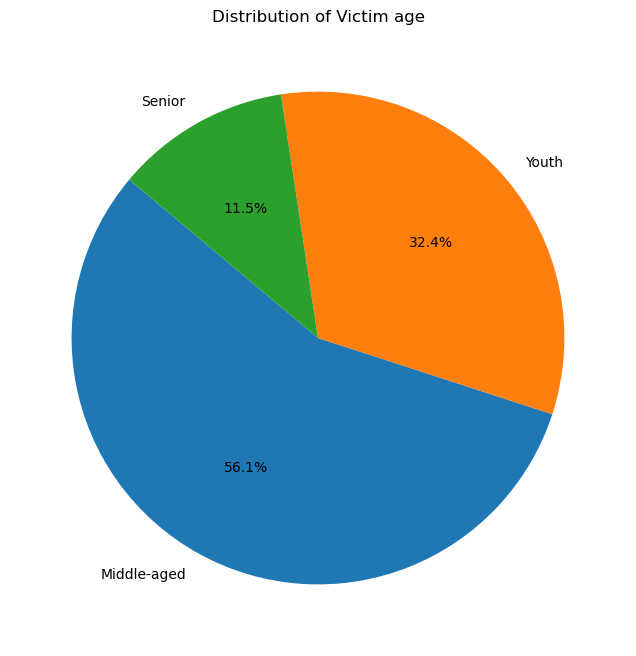

In [363]:
plot_pie_chart(data2, "Vict Age group", "Distribution of Victim age")

In [364]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import itertools as it

In [365]:
data = data2[["Crm Cd Desc", "Vict Sex", "Vict Race", "Area Category", "Vict Age group"]]

In [366]:
def fp_growth(data,sup):
    dataset = data.values.tolist()
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    x = fpgrowth(df, min_support=sup, use_colnames=True)
    y = x.values.tolist()
    tup_dict = {tuple(i[1]):(i[0]*len(data)) for i in y}
    for i,j in tup_dict.items():
        print("{} -> Support = {}".format(i,j/len(data)))
    return tup_dict

In [367]:
def build_rules(res,min_conf):
    itmsts = [(set(i),i) for i in res.keys() if len(i) > 1]
    for s,si in itmsts:
        sup = res[si]
        l = []
        for i in range(1,len(s)):
            l.extend(list(it.combinations(s,i)))
        l1 = map(set,l)
        for i in l1:
            for j in res.keys():
                if i == set(j):
                    den = res[j]
                    break
            diff = s - i
            conf = round((sup*100)/den,2)
            if conf > min_conf:
                print("{}->{} with confidence = {} %".format(i,diff,conf))

In [372]:
def top_itmsts(itmsts,data,column):
    l = sorted(itmsts.items(),key = lambda x: (-x[1],x[0]))
    top_l = []
    i = 0
    s = set(list(data[column].unique()))
    for tup in l:
        if i > 9:
            break
        if len(tup[0]) > 1:
            s1 = set(tup[0])
            if len(s1.intersection(s)) > 0:
                top_l.append(tup)
                i += 1
    for j in top_l:
        print("Itemset : {} , Support : {}".format(j[0],j[1]/len(data)))
    return top_l

In [369]:
itmsts = fp_growth(data,0.02)

('Middle-aged',) -> Support = 0.5610437656135315
('F',) -> Support = 0.49292021999651114
('B',) -> Support = 0.1910010104567462
('South LA',) -> Support = 0.10851219295445046
('BATTERY - SIMPLE ASSAULT',) -> Support = 0.10608314709551285
('M',) -> Support = 0.5070797800034889
('Central LA',) -> Support = 0.4219792444943273
('H',) -> Support = 0.4093435980817779
('Youth',) -> Support = 0.3241146983605586
('W',) -> Support = 0.2565227122370591
('Valley',) -> Support = 0.17867310901412994
('Senior',) -> Support = 0.11484153602590982
('VANDALISM - MISDEAMEANOR ($399 OR UNDER)',) -> Support = 0.028098596880420507
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',) -> Support = 0.034763661737261496
('O',) -> Support = 0.14313267922441686
('BURGLARY FROM VEHICLE',) -> Support = 0.08005812594833175
('CRIMINAL THREATS - NO WEAPON DISPLAYED',) -> Support = 0.02690382229126827
('East LA',) -> Support = 0.07503875611787127
('INTIMATE PARTNER - SIMPLE ASSAULT',) -> Support = 0.06756730069

In [373]:
t_itmsts = top_itmsts(itmsts,data,"Crm Cd Desc")

Itemset : ('BATTERY - SIMPLE ASSAULT', 'Middle-aged') , Support : 0.057610845788501855
Itemset : ('BATTERY - SIMPLE ASSAULT', 'M') , Support : 0.05595527659196308
Itemset : ('M', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT') , Support : 0.05381258166761568
Itemset : ('BATTERY - SIMPLE ASSAULT', 'H') , Support : 0.053524585037999096
Itemset : ('THEFT OF IDENTITY', 'Middle-aged') , Support : 0.05159418477205478
Itemset : ('F', 'INTIMATE PARTNER - SIMPLE ASSAULT') , Support : 0.05131112522751734
Itemset : ('BATTERY - SIMPLE ASSAULT', 'F') , Support : 0.05012787050354976
Itemset : ('F', 'THEFT OF IDENTITY') , Support : 0.04963416199563562
Itemset : ('Central LA', 'BATTERY - SIMPLE ASSAULT') , Support : 0.04928362895501657
Itemset : ('BURGLARY FROM VEHICLE', 'Middle-aged') , Support : 0.04661760301228018


In [374]:
build_rules(itmsts,55)

{'B'}->{'F'} with confidence = 56.27 %
{'B'}->{'Middle-aged'} with confidence = 55.39 %
{'B', 'Middle-aged'}->{'F'} with confidence = 55.11 %
{'Central LA', 'B'}->{'Middle-aged'} with confidence = 55.02 %
{'M', 'B'}->{'Middle-aged'} with confidence = 56.86 %
{'Central LA', 'M', 'B'}->{'Middle-aged'} with confidence = 57.06 %
{'Youth', 'B'}->{'F'} with confidence = 61.32 %
{'South LA'}->{'F'} with confidence = 57.23 %
{'South LA', 'Middle-aged'}->{'F'} with confidence = 56.97 %
{'South LA', 'B'}->{'F'} with confidence = 63.8 %
{'Youth', 'South LA'}->{'F'} with confidence = 60.01 %
{'BATTERY - SIMPLE ASSAULT', 'M'}->{'Middle-aged'} with confidence = 55.26 %
{'Central LA', 'BATTERY - SIMPLE ASSAULT'}->{'Middle-aged'} with confidence = 56.27 %
{'BATTERY - SIMPLE ASSAULT', 'Youth'}->{'H'} with confidence = 58.69 %
{'M'}->{'Middle-aged'} with confidence = 58.14 %
{'Central LA'}->{'Middle-aged'} with confidence = 55.94 %
{'Central LA', 'M'}->{'Middle-aged'} with confidence = 58.46 %
{'H', 'M'

In [375]:
data_1 = data2[["Vict Sex", "Crime Category", "Vict Race", "Area Category", "Vict Age group"]]

In [376]:
itmsts_1 = fp_growth(data_1,0.02)

('Middle-aged',) -> Support = 0.5610437656135315
('F',) -> Support = 0.49292021999651114
('Violent Crimes',) -> Support = 0.32155564259453695
('B',) -> Support = 0.1910010104567462
('South LA',) -> Support = 0.10851219295445046
('M',) -> Support = 0.5070797800034889
('Central LA',) -> Support = 0.4219792444943273
('H',) -> Support = 0.4093435980817779
('Youth',) -> Support = 0.3241146983605586
('Property Crimes',) -> Support = 0.2737547848582892
('W',) -> Support = 0.2565227122370591
('Valley',) -> Support = 0.17867310901412994
('Senior',) -> Support = 0.11484153602590982
('Sexual Offenses',) -> Support = 0.03444439690214368
('Petty Thefts',) -> Support = 0.08879841223343855
('Grand Thefts',) -> Support = 0.08299404587539455
('O',) -> Support = 0.14313267922441686
('Public Order Crimes',) -> Support = 0.05062980748659581
('East LA',) -> Support = 0.07503875611787127
('Harbor Area',) -> Support = 0.038538886127778345
('White-Collar Crimes',) -> Support = 0.08698814770442001
('West LA',)

In [377]:
t_itmsts_1 = top_itmsts(itmsts_1,data_1,"Crime Category")

Itemset : ('Violent Crimes', 'Middle-aged') , Support : 0.17363892792843202
Itemset : ('Violent Crimes', 'M') , Support : 0.16737047557294873
Itemset : ('Violent Crimes', 'H') , Support : 0.16509941643654363
Itemset : ('Property Crimes', 'Middle-aged') , Support : 0.16180967207880903
Itemset : ('Violent Crimes', 'F') , Support : 0.15418516702158822
Itemset : ('M', 'Property Crimes') , Support : 0.1512953265552641
Itemset : ('Central LA', 'Violent Crimes') , Support : 0.15005611820039957
Itemset : ('F', 'Property Crimes') , Support : 0.12245945830302511
Itemset : ('Violent Crimes', 'Youth') , Support : 0.11923060466126659
Itemset : ('Central LA', 'Property Crimes') , Support : 0.11399894017240302


In [378]:
build_rules(itmsts_1,55)

{'Violent Crimes', 'M'}->{'Middle-aged'} with confidence = 55.42 %
{'Central LA', 'Violent Crimes', 'M'}->{'Middle-aged'} with confidence = 56.57 %
{'Central LA', 'Violent Crimes', 'Middle-aged'}->{'M'} with confidence = 56.36 %
{'Central LA', 'H', 'Violent Crimes'}->{'M'} with confidence = 55.74 %
{'Violent Crimes', 'H', 'Central LA', 'Middle-aged'}->{'M'} with confidence = 57.75 %
{'Violent Crimes', 'H', 'Central LA', 'M'}->{'Middle-aged'} with confidence = 56.21 %
{'Violent Crimes', 'Youth'}->{'H'} with confidence = 57.1 %
{'Violent Crimes', 'Youth', 'M'}->{'H'} with confidence = 59.24 %
{'Violent Crimes', 'Youth', 'F'}->{'H'} with confidence = 55.11 %
{'B'}->{'F'} with confidence = 56.27 %
{'B'}->{'Middle-aged'} with confidence = 55.39 %
{'B', 'Middle-aged'}->{'F'} with confidence = 55.11 %
{'Central LA', 'B'}->{'Middle-aged'} with confidence = 55.02 %
{'M', 'B'}->{'Middle-aged'} with confidence = 56.86 %
{'Central LA', 'M', 'B'}->{'Middle-aged'} with confidence = 57.06 %
{'Youth',

## Old data

In [379]:
data_past = pd.read_csv(r"Crime_Data_from_2010_to_2019.csv")

In [380]:
data_past['DATE OCC'] = pd.to_datetime(data_past['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
data_past.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [381]:
data_past2 = data_past[["DATE OCC","AREA NAME","Vict Age","Crm Cd Desc","Vict Sex","Vict Descent"]]
data_past2 = data_past2.dropna(subset=["Vict Sex","Vict Descent"])
print(data_past2["AREA NAME"].unique())
print(data_past2["Vict Sex"].unique())

['Newton' 'Pacific' 'Hollywood' 'Central' 'Northeast' 'Hollenbeck'
 'Southwest' 'Devonshire' 'Rampart' 'Olympic' 'Wilshire' '77th Street'
 'Harbor' 'West LA' 'Southeast' 'Mission' 'Topanga' 'West Valley'
 'Van Nuys' 'N Hollywood' 'Foothill']
['M' 'F' 'X' 'H' '-' 'N']


In [382]:
data_past2['Crime Category'] = data_past2.apply(crime_category, axis=1)
data_past2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category
0,2010-02-20,Newton,48,VIOLATION OF COURT ORDER,M,H,Other Crimes
1,2010-09-12,Pacific,0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",M,W,Property Crimes
2,2010-08-09,Newton,0,OTHER MISCELLANEOUS CRIME,M,H,Other Crimes
3,2010-01-05,Hollywood,47,VIOLATION OF COURT ORDER,F,W,Other Crimes
4,2010-01-02,Central,47,"RAPE, ATTEMPTED",F,H,Sexual Offenses


In [383]:
print(data_past2["Crime Category"].unique())

['Other Crimes' 'Property Crimes' 'Sexual Offenses' 'Petty Thefts'
 'Violent Crimes' 'Grand Thefts' 'Public Order Crimes'
 'White-Collar Crimes' 'Crimes Against Property and Services']


In [384]:
data_past2 = data_past2[(data_past2["Vict Age"] != 0) & (data_past2["Vict Sex"] != "X") & (data_past2["Vict Sex"] != "H") & (data_past2["Vict Sex"] != "-") & (data_past2["Vict Sex"] != "N") & (data_past2["Vict Descent"] != "X") & (data_past2["Vict Descent"] != "-") & (data_past2["Crm Cd Desc"] != None)]
print(len(data_past2))

1740819


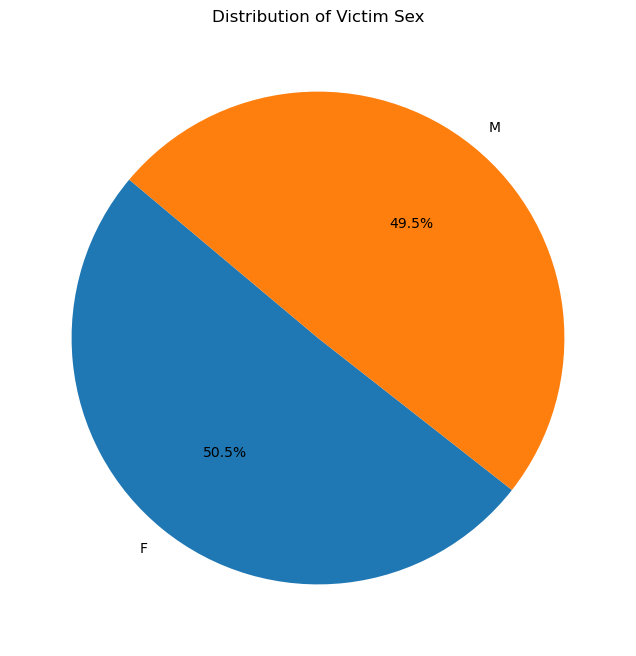

In [385]:
plot_pie_chart(data_past2, "Vict Sex", "Distribution of Victim Sex")

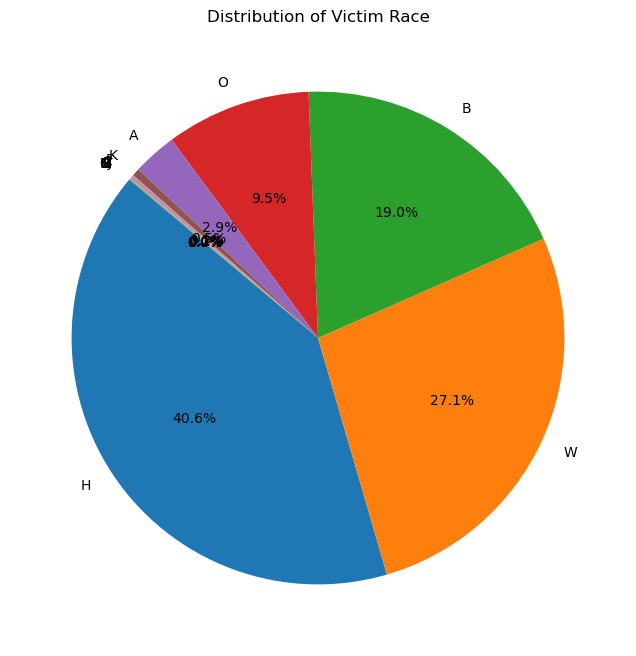

In [386]:
plot_pie_chart(data_past2, "Vict Descent", "Distribution of Victim Race")

In [387]:
data_past2['Vict Race'] = data_past2.apply(race_category, axis=1)
data_past2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category,Vict Race
0,2010-02-20,Newton,48,VIOLATION OF COURT ORDER,M,H,Other Crimes,H
3,2010-01-05,Hollywood,47,VIOLATION OF COURT ORDER,F,W,Other Crimes,W
4,2010-01-02,Central,47,"RAPE, ATTEMPTED",F,H,Sexual Offenses,H
5,2010-01-04,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,B,Petty Thefts,B
6,2010-01-07,Central,46,BURGLARY FROM VEHICLE,M,H,Property Crimes,H


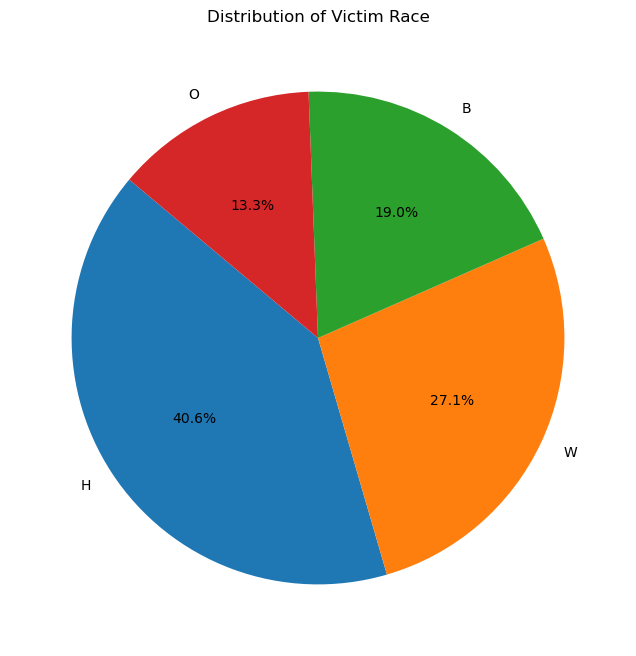

In [388]:
plot_pie_chart(data_past2, "Vict Race", "Distribution of Victim Race")

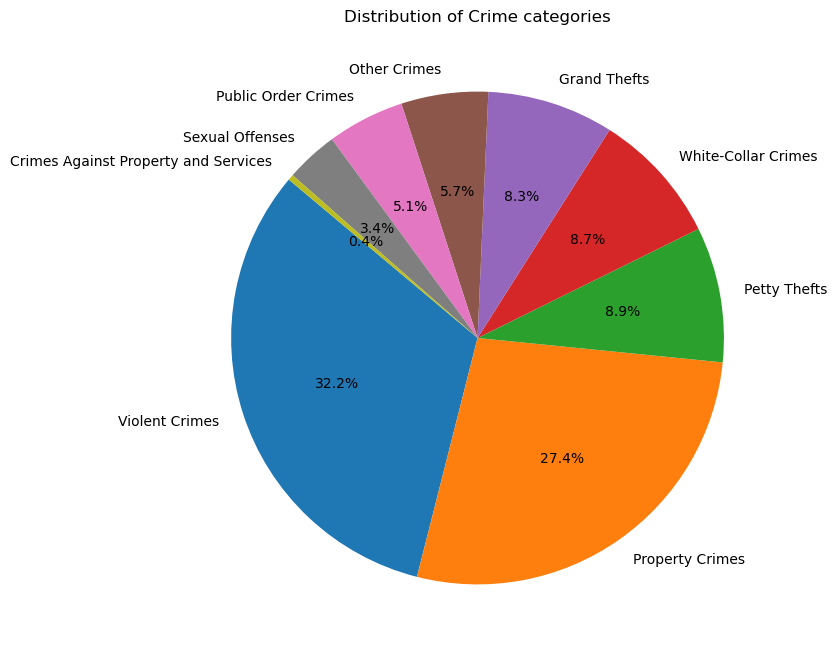

In [389]:
plot_pie_chart(data2, "Crime Category", "Distribution of Crime categories")

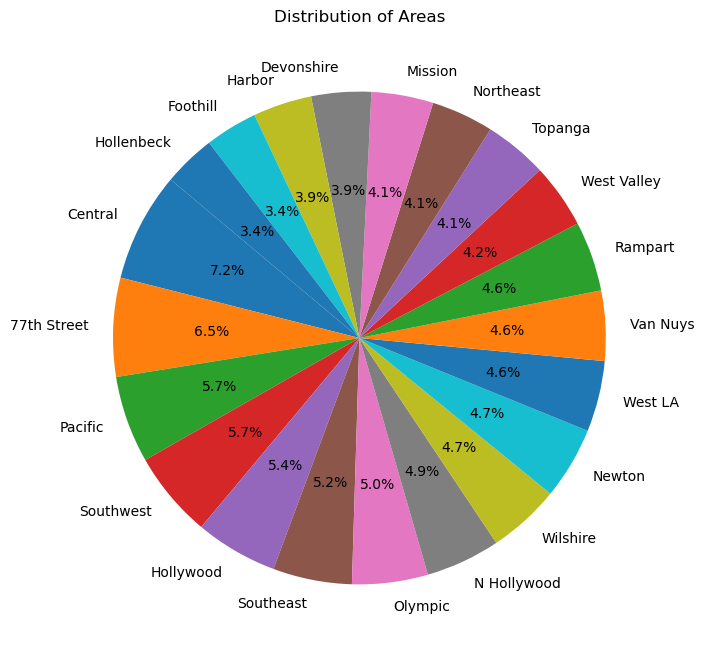

In [390]:
plot_pie_chart(data2, "AREA NAME", "Distribution of Areas")

In [391]:
data_past2['Area Category'] = data_past2.apply(region_category, axis=1)
data_past2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category,Vict Race,Area Category
0,2010-02-20,Newton,48,VIOLATION OF COURT ORDER,M,H,Other Crimes,H,Central LA
3,2010-01-05,Hollywood,47,VIOLATION OF COURT ORDER,F,W,Other Crimes,W,Central LA
4,2010-01-02,Central,47,"RAPE, ATTEMPTED",F,H,Sexual Offenses,H,Central LA
5,2010-01-04,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,B,Petty Thefts,B,Central LA
6,2010-01-07,Central,46,BURGLARY FROM VEHICLE,M,H,Property Crimes,H,Central LA


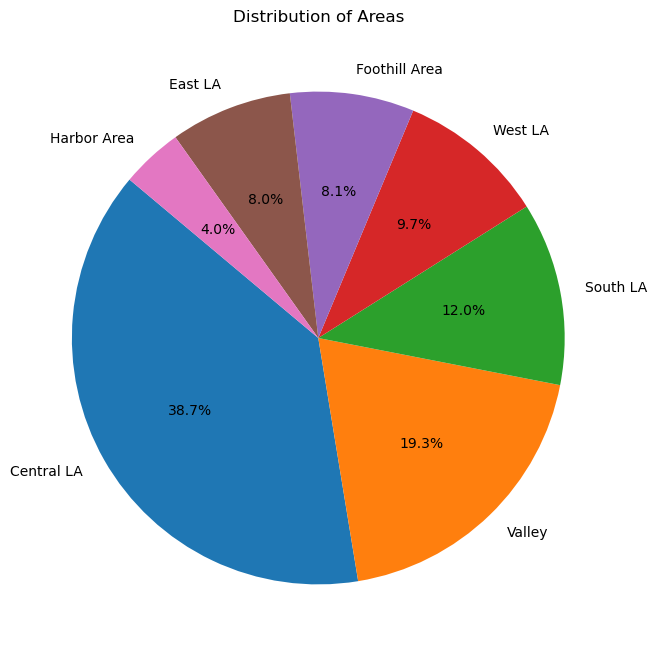

In [392]:
plot_pie_chart(data_past2, "Area Category", "Distribution of Areas")

In [393]:
data_past2['Vict Age group'] = data_past2.apply(age_category, axis=1)
data_past2.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category,Vict Race,Area Category,Vict Age group
0,2010-02-20,Newton,48,VIOLATION OF COURT ORDER,M,H,Other Crimes,H,Central LA,Middle-aged
3,2010-01-05,Hollywood,47,VIOLATION OF COURT ORDER,F,W,Other Crimes,W,Central LA,Middle-aged
4,2010-01-02,Central,47,"RAPE, ATTEMPTED",F,H,Sexual Offenses,H,Central LA,Middle-aged
5,2010-01-04,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,B,Petty Thefts,B,Central LA,Youth
6,2010-01-07,Central,46,BURGLARY FROM VEHICLE,M,H,Property Crimes,H,Central LA,Middle-aged


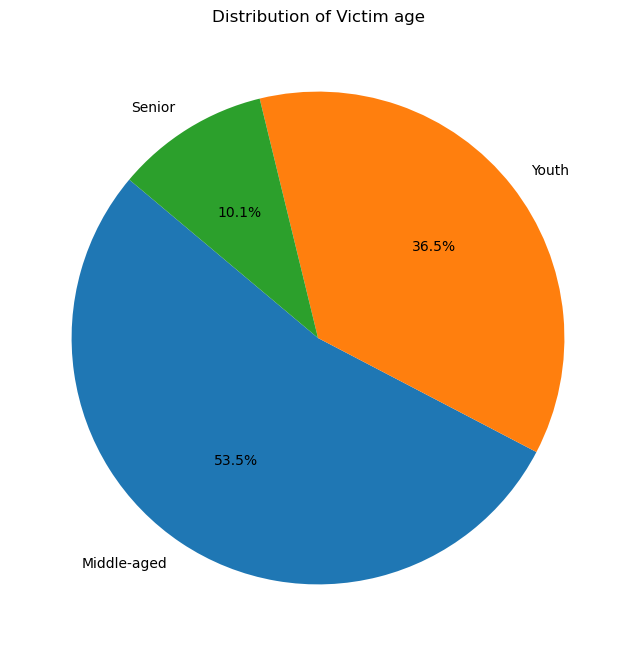

In [394]:
plot_pie_chart(data_past2, "Vict Age group", "Distribution of Victim age")

In [395]:
data_till_2014 = data_past2[data_past2["DATE OCC"].dt.year < 2014]
data_2014_to_2015 = data_past2[(data_past2["DATE OCC"].dt.year >= 2014) & (data_past2["DATE OCC"].dt.year < 2015)]
data_till_2014.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category,Vict Race,Area Category,Vict Age group
0,2010-02-20,Newton,48,VIOLATION OF COURT ORDER,M,H,Other Crimes,H,Central LA,Middle-aged
3,2010-01-05,Hollywood,47,VIOLATION OF COURT ORDER,F,W,Other Crimes,W,Central LA,Middle-aged
4,2010-01-02,Central,47,"RAPE, ATTEMPTED",F,H,Sexual Offenses,H,Central LA,Middle-aged
5,2010-01-04,Central,23,SHOPLIFTING - PETTY THEFT ($950 & UNDER),M,B,Petty Thefts,B,Central LA,Youth
6,2010-01-07,Central,46,BURGLARY FROM VEHICLE,M,H,Property Crimes,H,Central LA,Middle-aged


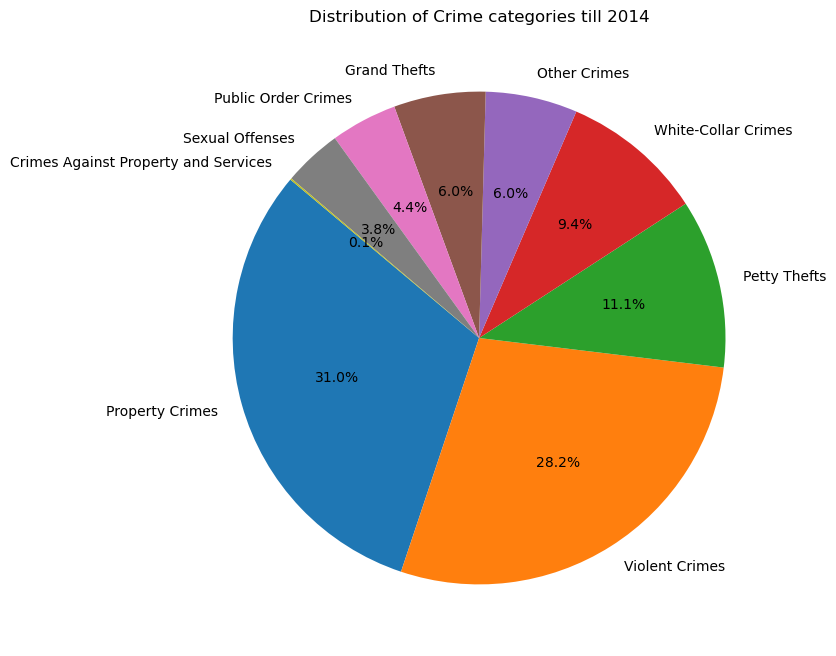

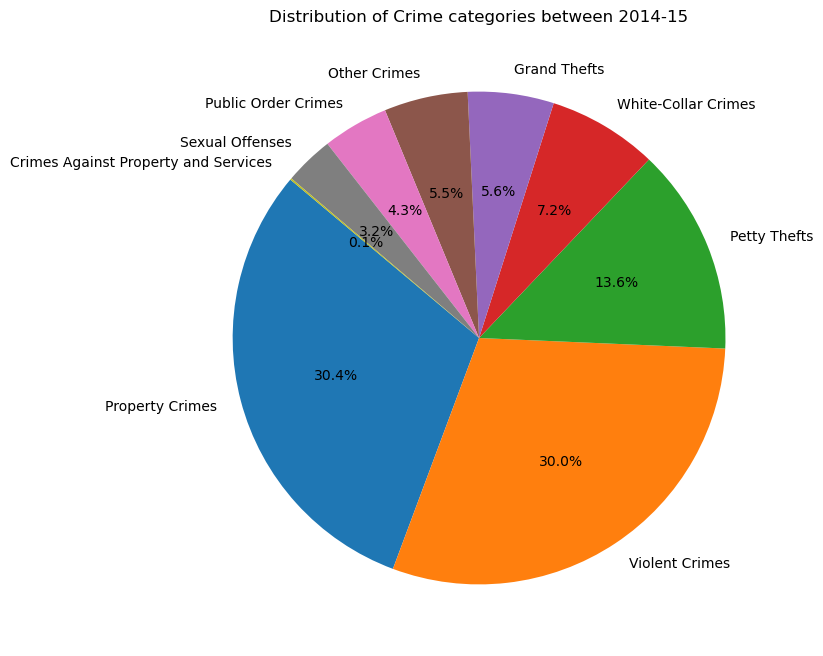

In [418]:
plot_pie_chart(data_till_2014, "Crime Category", "Distribution of Crime categories till 2014")
plot_pie_chart(data_2014_to_2015, "Crime Category", "Distribution of Crime categories between 2014-15")

In [397]:
data_2014_to_2015.head()

,DATE OCC,AREA NAME,Vict Age,Crm Cd Desc,Vict Sex,Vict Descent,Crime Category,Vict Race,Area Category,Vict Age group
613606,2014-06-02,Central,43,BURGLARY FROM VEHICLE,M,W,Property Crimes,W,Central LA,Middle-aged
613608,2014-08-25,Southwest,44,BATTERY - SIMPLE ASSAULT,M,B,Violent Crimes,B,South LA,Middle-aged
613610,2014-01-03,Newton,34,BATTERY - SIMPLE ASSAULT,M,H,Violent Crimes,H,Central LA,Middle-aged
613615,2014-01-23,Pacific,56,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",F,W,Grand Thefts,W,West LA,Middle-aged
613616,2014-03-24,Central,28,"THEFT, PERSON",F,B,Property Crimes,B,Central LA,Youth


In [398]:
past_data = data_past2[["Crm Cd Desc", "Vict Sex", "Vict Race", "Area Category", "Vict Age group"]]
past_data_till_2014 = data_till_2014[["Crm Cd Desc", "Vict Sex", "Vict Race", "Area Category", "Vict Age group"]]
past_data_2014_to_2015 = data_2014_to_2015[["Crm Cd Desc", "Vict Sex", "Vict Race", "Area Category", "Vict Age group"]]

In [399]:
past_itmsts = fp_growth(past_data,0.02)

('Middle-aged',) -> Support = 0.5345392025247886
('M',) -> Support = 0.4946815263390393
('H',) -> Support = 0.40623407717861537
('Central LA',) -> Support = 0.3869868148268143
('F',) -> Support = 0.5053184736609607
('W',) -> Support = 0.27089203415174123
('Youth',) -> Support = 0.36462033100511887
('B',) -> Support = 0.1901001769856602
('BURGLARY FROM VEHICLE',) -> Support = 0.09174417328854982
('ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',) -> Support = 0.05247357709216179
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',) -> Support = 0.03736287345209353
('BATTERY - SIMPLE ASSAULT',) -> Support = 0.10820022070071615
('ROBBERY',) -> Support = 0.042361095553299914
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',) -> Support = 0.05267348299851966
('O',) -> Support = 0.13277371168398322
('INTIMATE PARTNER - SIMPLE ASSAULT',) -> Support = 0.06544505775729699
('THEFT PLAIN - PETTY ($950 & UNDER)',) -> Support = 0.07472459801966776
('Senior',) -> Support = 0.100840

In [400]:
past_itmsts_till_2014 = fp_growth(past_data_till_2014,0.02)

('Middle-aged',) -> Support = 0.5235594674225189
('M',) -> Support = 0.48612687875284377
('H',) -> Support = 0.4056703837690672
('Central LA',) -> Support = 0.37288927013016077
('F',) -> Support = 0.5138731212471562
('W',) -> Support = 0.27726699735203075
('Youth',) -> Support = 0.3873583709394697
('B',) -> Support = 0.19344049528213927
('BURGLARY FROM VEHICLE',) -> Support = 0.09531346734792824
('ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',) -> Support = 0.044752918360496774
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',) -> Support = 0.042955282885167645
('BATTERY - SIMPLE ASSAULT',) -> Support = 0.11692835564837951
('ROBBERY',) -> Support = 0.045285495841569386
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',) -> Support = 0.046607242755379856
('O',) -> Support = 0.12362212359676276
('INTIMATE PARTNER - SIMPLE ASSAULT',) -> Support = 0.06035579756088465
('THEFT PLAIN - PETTY ($950 & UNDER)',) -> Support = 0.07399694178197143
('Senior',) -> Support = 0.08

In [401]:
past_itmsts_2014_to_2015 = fp_growth(past_data_2014_to_2015,0.02)

('Middle-aged',) -> Support = 0.5378672734304035
('M',) -> Support = 0.49429360289951524
('Central LA',) -> Support = 0.48380714266442426
('W',) -> Support = 0.2806701981275463
('BURGLARY FROM VEHICLE',) -> Support = 0.08471009344281462
('B',) -> Support = 0.21346152116628145
('BATTERY - SIMPLE ASSAULT',) -> Support = 0.11915532731965717
('South LA',) -> Support = 0.09984621057459686
('H',) -> Support = 0.38558876168035183
('F',) -> Support = 0.5057063971004847
('West LA',) -> Support = 0.13320322687987338
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',) -> Support = 0.03574030272234264
('Youth',) -> Support = 0.36655844447842
('ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',) -> Support = 0.052468275310052076
('VANDALISM - MISDEAMEANOR ($399 OR UNDER)',) -> Support = 0.05149697367592701
('Harbor Area',) -> Support = 0.05581386982759396
('BURGLARY',) -> Support = 0.0743045750105674
('Valley',) -> Support = 0.18432247214252953
('O',) -> Support = 0.12027951902582043
('Seni

In [402]:
t_past_itmsts = top_itmsts(past_itmsts,past_data,"Crm Cd Desc")

Itemset : ('BATTERY - SIMPLE ASSAULT', 'F') , Support : 0.056233301681564825
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Middle-aged') , Support : 0.05447493392477908
Itemset : ('BURGLARY FROM VEHICLE', 'Middle-aged') , Support : 0.052434515018505656
Itemset : ('F', 'INTIMATE PARTNER - SIMPLE ASSAULT') , Support : 0.05206916974136886
Itemset : ('BATTERY - SIMPLE ASSAULT', 'M') , Support : 0.051966919019151334
Itemset : ('BURGLARY FROM VEHICLE', 'M') , Support : 0.050391798343193635
Itemset : ('BATTERY - SIMPLE ASSAULT', 'H') , Support : 0.04906943226148152
Itemset : ('Central LA', 'BATTERY - SIMPLE ASSAULT') , Support : 0.04834678389884302
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Youth') , Support : 0.04476398752541189
Itemset : ('BURGLARY', 'Middle-aged') , Support : 0.04450204185501192


In [403]:
t_past_itmsts_till_2014 = top_itmsts(past_itmsts_till_2014,past_data_till_2014,"Crm Cd Desc")

Itemset : ('BATTERY - SIMPLE ASSAULT', 'F') , Support : 0.0661604445604744
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Middle-aged') , Support : 0.055416402491328835
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Youth') , Support : 0.05509864617909223
Itemset : ('BURGLARY FROM VEHICLE', 'Middle-aged') , Support : 0.053368142319024356
Itemset : ('Central LA', 'BATTERY - SIMPLE ASSAULT') , Support : 0.05151083429679633
Itemset : ('BURGLARY', 'Middle-aged') , Support : 0.05119755342557714
Itemset : ('BATTERY - SIMPLE ASSAULT', 'H') , Support : 0.05111699548726364
Itemset : ('BURGLARY FROM VEHICLE', 'M') , Support : 0.05081415731175176
Itemset : ('BATTERY - SIMPLE ASSAULT', 'M') , Support : 0.05076791108790512
Itemset : ('F', 'INTIMATE PARTNER - SIMPLE ASSAULT') , Support : 0.04902994815947488


In [404]:
t_past_itmsts_2014_to_2015 = top_itmsts(past_itmsts_2014_to_2015,past_data_2014_to_2015,"Crm Cd Desc")

Itemset : ('BATTERY - SIMPLE ASSAULT', 'Central LA') , Support : 0.0623161946560423
Itemset : ('BATTERY - SIMPLE ASSAULT', 'F') , Support : 0.06223525285319855
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Middle-aged') , Support : 0.061830543838979776
Itemset : ('BATTERY - SIMPLE ASSAULT', 'M') , Support : 0.056920074466458616
Itemset : ('F', 'INTIMATE PARTNER - SIMPLE ASSAULT') , Support : 0.055705947423802284
Itemset : ('BATTERY - SIMPLE ASSAULT', 'H') , Support : 0.05093937458967003
Itemset : ('BATTERY - SIMPLE ASSAULT', 'Youth') , Support : 0.04918563552805533
Itemset : ('BURGLARY FROM VEHICLE', 'Middle-aged') , Support : 0.04762975420672536
Itemset : ('THEFT PLAIN - PETTY ($950 & UNDER)', 'Middle-aged') , Support : 0.04698221978397532
Itemset : ('THEFT PLAIN - PETTY ($950 & UNDER)', 'M') , Support : 0.04647858189961418


In [405]:
build_rules(past_itmsts,55)

{'M'}->{'Middle-aged'} with confidence = 56.26 %
{'Central LA', 'M'}->{'Middle-aged'} with confidence = 56.41 %
{'W'}->{'Middle-aged'} with confidence = 57.06 %
{'Central LA', 'W'}->{'Middle-aged'} with confidence = 57.29 %
{'Central LA', 'W'}->{'M'} with confidence = 55.61 %
{'Central LA', 'W', 'M'}->{'Middle-aged'} with confidence = 61.23 %
{'Central LA', 'W', 'Middle-aged'}->{'M'} with confidence = 59.44 %
{'W', 'M'}->{'Middle-aged'} with confidence = 59.72 %
{'W', 'Middle-aged'}->{'M'} with confidence = 55.51 %
{'Youth'}->{'F'} with confidence = 55.18 %
{'H', 'Youth'}->{'F'} with confidence = 55.07 %
{'B'}->{'F'} with confidence = 58.03 %
{'Central LA', 'B'}->{'F'} with confidence = 56.52 %
{'M', 'B'}->{'Middle-aged'} with confidence = 56.1 %
{'Central LA', 'M', 'B'}->{'Middle-aged'} with confidence = 57.16 %
{'Youth', 'B'}->{'F'} with confidence = 63.76 %
{'Central LA', 'Youth', 'B'}->{'F'} with confidence = 63.26 %
{'B', 'Middle-aged'}->{'F'} with confidence = 55.39 %
{'BURGLARY 

In [406]:
past_data_1 = data_past2[["Vict Sex", "Crime Category", "Vict Race", "Area Category", "Vict Age group"]]
past_data_till_2014_1 = data_till_2014[["Vict Sex", "Crime Category", "Vict Race", "Area Category", "Vict Age group"]]
past_data_2014_to_2015_1 = data_2014_to_2015[["Vict Sex", "Crime Category", "Vict Race", "Area Category", "Vict Age group"]]

In [407]:
past_itmsts_1 = fp_growth(past_data_1,0.02)

('Middle-aged',) -> Support = 0.5345392025247886
('M',) -> Support = 0.4946815263390393
('H',) -> Support = 0.40623407717861537
('Central LA',) -> Support = 0.3869868148268143
('Other Crimes',) -> Support = 0.058025561531669864
('F',) -> Support = 0.5053184736609607
('W',) -> Support = 0.27089203415174123
('Sexual Offenses',) -> Support = 0.03784310718116013
('Youth',) -> Support = 0.36462033100511887
('B',) -> Support = 0.1901001769856602
('Petty Thefts',) -> Support = 0.1183638276006868
('Property Crimes',) -> Support = 0.3065499629771964
('Violent Crimes',) -> Support = 0.2921211222993315
('Grand Thefts',) -> Support = 0.05848798755068735
('Public Order Crimes',) -> Support = 0.0434875768244717
('O',) -> Support = 0.13277371168398322
('Senior',) -> Support = 0.10084046647009252
('White-Collar Crimes',) -> Support = 0.08382835895058591
('South LA',) -> Support = 0.12021927609935323
('Foothill Area',) -> Support = 0.08137319273284586
('Harbor Area',) -> Support = 0.040434990656696645


In [408]:
past_itmsts_till_2014_1 = fp_growth(past_data_till_2014_1,0.02)

('Middle-aged',) -> Support = 0.5235594674225189
('M',) -> Support = 0.48612687875284377
('H',) -> Support = 0.4056703837690672
('Central LA',) -> Support = 0.37288927013016077
('Other Crimes',) -> Support = 0.06027673143624361
('F',) -> Support = 0.5138731212471562
('W',) -> Support = 0.27726699735203075
('Sexual Offenses',) -> Support = 0.03837093946966024
('Youth',) -> Support = 0.3873583709394697
('B',) -> Support = 0.19344049528213927
('Petty Thefts',) -> Support = 0.11090739566628129
('Property Crimes',) -> Support = 0.30979748629396187
('Violent Crimes',) -> Support = 0.28216312982508485
('Grand Thefts',) -> Support = 0.0601857308022228
('Public Order Crimes',) -> Support = 0.04362212359676276
('O',) -> Support = 0.12362212359676276
('Senior',) -> Support = 0.08908216163801141
('White-Collar Crimes',) -> Support = 0.09369634132696826
('South LA',) -> Support = 0.1243799649423787
('Foothill Area',) -> Support = 0.08905978443292432
('Harbor Area',) -> Support = 0.04384589564763361

In [409]:
past_itmsts_2014_to_2015_1 = fp_growth(past_data_2014_to_2015_1,0.02)

('Middle-aged',) -> Support = 0.5378672734304035
('M',) -> Support = 0.49429360289951524
('Central LA',) -> Support = 0.48380714266442426
('Property Crimes',) -> Support = 0.30427822395697496
('W',) -> Support = 0.2806701981275463
('Violent Crimes',) -> Support = 0.3000152890072038
('B',) -> Support = 0.21346152116628145
('South LA',) -> Support = 0.09984621057459686
('H',) -> Support = 0.38558876168035183
('F',) -> Support = 0.5057063971004847
('West LA',) -> Support = 0.13320322687987338
('Grand Thefts',) -> Support = 0.056389455981149555
('Youth',) -> Support = 0.36655844447842
('Harbor Area',) -> Support = 0.05581386982759396
('Valley',) -> Support = 0.18432247214252953
('O',) -> Support = 0.12027951902582043
('Senior',) -> Support = 0.09557428209117644
('Sexual Offenses',) -> Support = 0.032313766401956996
('Other Crimes',) -> Support = 0.05495049059726057
('White-Collar Crimes',) -> Support = 0.0720921657328381
('Public Order Crimes',) -> Support = 0.04319594211761743
('Petty The

In [410]:
t_past_itmsts_1 = top_itmsts(past_itmsts_1,past_data_1,"Crime Category")

Itemset : ('Property Crimes', 'Middle-aged') , Support : 0.18014566706820181
Itemset : ('M', 'Property Crimes') , Support : 0.1640365827808635
Itemset : ('Violent Crimes', 'F') , Support : 0.14903502317012854
Itemset : ('Violent Crimes', 'H') , Support : 0.14465834759386242
Itemset : ('Violent Crimes', 'M') , Support : 0.14308609912920298
Itemset : ('Violent Crimes', 'Middle-aged') , Support : 0.14297293400405212
Itemset : ('F', 'Property Crimes') , Support : 0.14251338019633286
Itemset : ('Violent Crimes', 'Youth') , Support : 0.13153751194121846
Itemset : ('Central LA', 'Violent Crimes') , Support : 0.13103832161758344
Itemset : ('Central LA', 'Property Crimes') , Support : 0.11390902787710842


In [411]:
t_past_itmsts_till_2014_1 = top_itmsts(past_itmsts_till_2014_1,past_data_till_2014_1,"Crime Category")

Itemset : ('Property Crimes', 'Middle-aged') , Support : 0.18259202625592064
Itemset : ('M', 'Property Crimes') , Support : 0.16224965501808825
Itemset : ('Violent Crimes', 'F') , Support : 0.14831760713086936
Itemset : ('F', 'Property Crimes') , Support : 0.14754783127587365
Itemset : ('Violent Crimes', 'Youth') , Support : 0.140416961921456
Itemset : ('Violent Crimes', 'H') , Support : 0.13967105508521985
Itemset : ('Violent Crimes', 'M') , Support : 0.13384552269421549
Itemset : ('Violent Crimes', 'Middle-aged') , Support : 0.12929698280684743
Itemset : ('Central LA', 'Violent Crimes') , Support : 0.1250960355051654
Itemset : ('H', 'Property Crimes') , Support : 0.10935889307425503


In [412]:
t_past_itmsts_2014_to_2015_1 = top_itmsts(past_itmsts_2014_to_2015_1,past_data_2014_to_2015_1,"Crime Category")

Itemset : ('Property Crimes', 'Middle-aged') , Support : 0.17895333255389376
Itemset : ('Central LA', 'Violent Crimes') , Support : 0.16718079700695201
Itemset : ('M', 'Property Crimes') , Support : 0.16137996780314953
Itemset : ('Violent Crimes', 'F') , Support : 0.15451790162872894
Itemset : ('Violent Crimes', 'Middle-aged') , Support : 0.14880700776141953
Itemset : ('Violent Crimes', 'M') , Support : 0.14549738737847487
Itemset : ('Central LA', 'Property Crimes') , Support : 0.14324900396614834
Itemset : ('F', 'Property Crimes') , Support : 0.1428982561538254
Itemset : ('Violent Crimes', 'H') , Support : 0.14195393512064824
Itemset : ('Violent Crimes', 'Youth') , Support : 0.13562248743153674


In [413]:
build_rules(past_itmsts_1,55)

{'M'}->{'Middle-aged'} with confidence = 56.26 %
{'Central LA', 'M'}->{'Middle-aged'} with confidence = 56.41 %
{'Other Crimes'}->{'F'} with confidence = 66.49 %
{'Other Crimes', 'H'}->{'F'} with confidence = 70.89 %
{'W'}->{'Middle-aged'} with confidence = 57.06 %
{'Central LA', 'W'}->{'Middle-aged'} with confidence = 57.29 %
{'Central LA', 'W'}->{'M'} with confidence = 55.61 %
{'Central LA', 'W', 'M'}->{'Middle-aged'} with confidence = 61.23 %
{'Central LA', 'W', 'Middle-aged'}->{'M'} with confidence = 59.44 %
{'W', 'M'}->{'Middle-aged'} with confidence = 59.72 %
{'W', 'Middle-aged'}->{'M'} with confidence = 55.51 %
{'W', 'Property Crimes'}->{'Middle-aged'} with confidence = 57.39 %
{'W', 'Property Crimes'}->{'M'} with confidence = 56.23 %
{'W', 'Property Crimes', 'Middle-aged'}->{'M'} with confidence = 58.86 %
{'W', 'M', 'Property Crimes'}->{'Middle-aged'} with confidence = 60.07 %
{'Violent Crimes', 'W'}->{'Middle-aged'} with confidence = 57.1 %
{'Sexual Offenses'}->{'F'} with conf

In [414]:
def calculate_dissimilarity(suppA, suppB):
    # Create the union of all itemsets in A and B
    itemsets = set(suppA.keys()).union(set(suppB.keys()))

    # Initialize numerator and denominator for the dissimilarity measure
    numerator = 0
    denominator = 0

    # Calculate the sum of absolute differences for the numerator
    for itemset in itemsets:
        numerator += abs(suppA.get(itemset, 0) - suppB.get(itemset, 0))

    # Calculate the sum of supports for the denominator
    for itemset in itemsets:
        denominator += suppA.get(itemset, 0) + suppB.get(itemset, 0)

    # Calculate the dissimilarity measure
    dissimilarity = numerator / denominator if denominator != 0 else 0
    return dissimilarity

# # Example usage with the modified function
# # Example support counts for dataset A
# suppA = {('milk',): 0.8, ('bread',): 0.6, ('butter',): 0.1}

# # Example support counts for dataset B
# suppB = {('milk',): 0.5, ('bread',): 0.7, ('cheese',): 0.2}

# Calculate dissimilarity
dissimilarity = calculate_dissimilarity(itmsts, past_itmsts)
dissimilarity

0.5207743842411366

In [415]:
dissimilarity1 = calculate_dissimilarity(itmsts_1, past_itmsts_1)
dissimilarity1

0.49515445396505925

In [416]:
dissimilarity2 = calculate_dissimilarity(past_itmsts_till_2014, past_itmsts_2014_to_2015)
dissimilarity2

0.7380279119973936

In [417]:
dissimilarity3 = calculate_dissimilarity(past_itmsts_till_2014_1, past_itmsts_2014_to_2015_1)
dissimilarity3

0.7188160414875681